# Problem
## In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their effciency in generating revenue, and for us to offer thorough business advice to address this problem.

## The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [175]:
# loading Dataset

In [176]:
data= pd.read_csv("hotel_booking.csv")

# Exploratory Data Analysis and Data Cleaning

In [177]:
data.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.00,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [178]:
data.shape

(119390, 36)

In [179]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [180]:
# Droping 'name', 'email','phone-number', 'credit_card' Columns
df = data.drop(['name', 'email','phone-number', 'credit_card'],axis=1)

In [181]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [182]:
# loading 
df.to_csv("hotel_booking_c.csv",index=False)

In [183]:
data=pd.read_csv("hotel_booking_c.csv")

In [184]:
data.shape

(119390, 32)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [186]:
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [188]:
data.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [189]:
for colm in data.describe(include="object").columns:
    print(colm)
    print(data[colm].unique())
    print("*"*15)

hotel
['Resort Hotel' 'City Hotel']
***************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
***************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
***************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BH

In [190]:
# missing
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [191]:
# remove
data.drop(['agent','company'],axis=1,inplace = True)
# remove missing values
data.dropna(inplace= True)

In [192]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [193]:
# numerical columns
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [194]:
# removing adr outlier
data=data[data['adr']<5000]

In [195]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis and Visualizations

In [196]:
data["is_canceled"].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


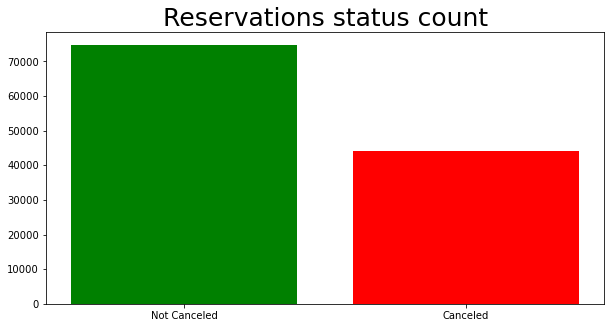

In [197]:
cancelled_percentage = data["is_canceled"].value_counts(normalize= True)
print(cancelled_percentage)

plt.figure(figsize= (10,5))
plt.title("Reservations status count",size =25)
plt.bar(["Not Canceled" , "Canceled"],data["is_canceled"].value_counts(),color=['green', 'red'])
plt.show()

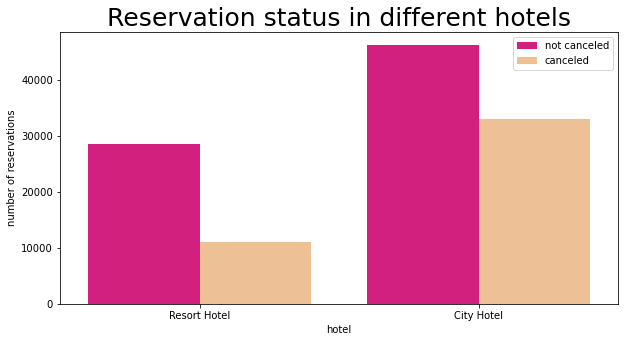

In [198]:
plt.figure(figsize= (10,5))
s = sns.countplot(x='hotel', hue= "is_canceled",data= data, palette="Accent_r")
legend_labels,_=s.get_legend_handles_labels()
s.legend(bbox_to_anchor=[1,1])
plt.title("Reservation status in different hotels",size =25)
plt.xlabel("hotel")
plt.ylabel("number of reservations")
plt.legend(["not canceled", "canceled"])
plt.show()


In [199]:
resort_hotel = data[data["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [200]:
city_hotel = data[data["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [201]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

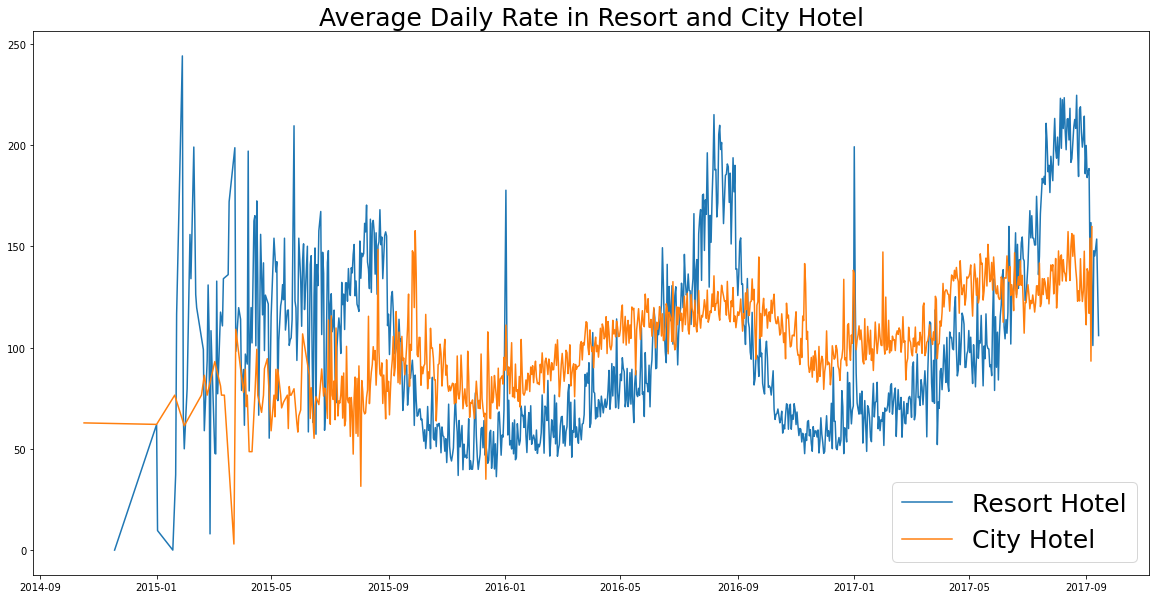

In [203]:
plt.figure(figsize=(20,10))
plt.title("Average Daily Rate in Resort and City Hotel",fontsize = 25)
plt.plot(resort_hotel.index, resort_hotel["adr"], label = "Resort Hotel")
plt.plot(city_hotel.index, city_hotel["adr"], label = "City Hotel")
plt.legend(fontsize=25)
plt.show()

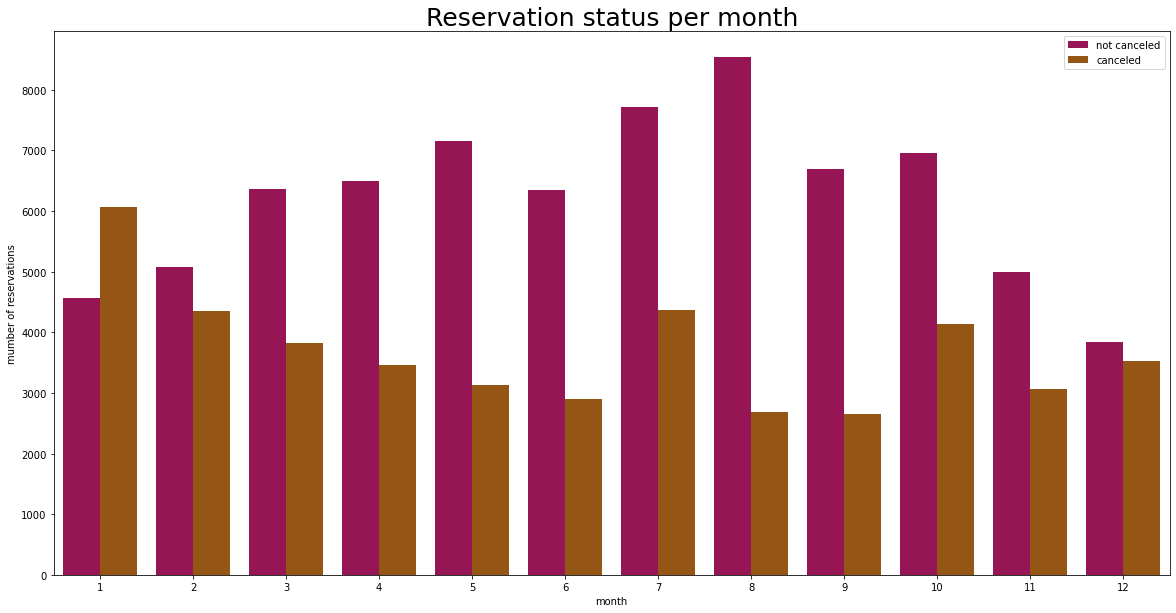

In [204]:
data["month"] = data["reservation_status_date"].dt.month
plt.figure(figsize=(20,10))
s= sns.countplot(x="month" , hue="is_canceled", data =data ,palette= "brg" )
legend_labels,_ = s.get_legend_handles_labels()
s.legend(bbox_to_anchor = [1,1])
plt.title("Reservation status per month", size = 25)
plt.xlabel("month")
plt.ylabel("mumber of reservations")
plt.legend(["not canceled", "canceled"])
plt.show()


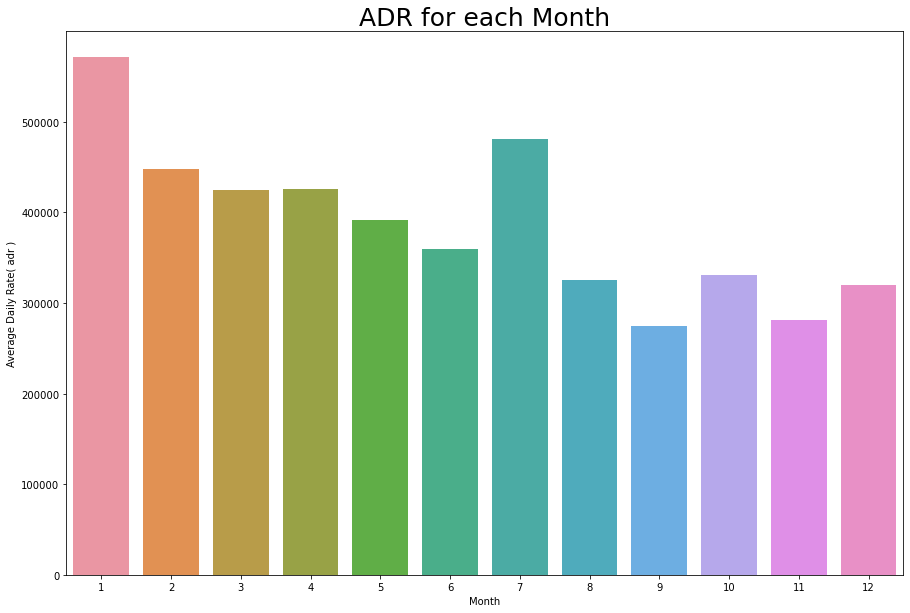

In [210]:
plt.figure(figsize= (15,10))
plt.title("ADR for each Month", fontsize = 25)
sns.barplot("month", "adr", data= data [data["is_canceled"]== 1].groupby("month")[["adr"]].sum().reset_index())
plt.xlabel("Month")
plt.ylabel("Average Daily Rate( adr )")
plt.show()


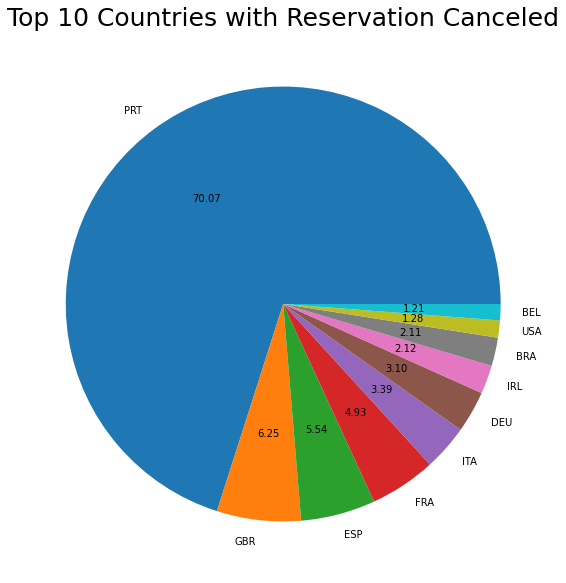

In [128]:
canceled_data = data[data["is_canceled"]==1]
top_10_country = canceled_data ["country"].value_counts()[:10]
plt.figure(figsize= (10,10))
plt.title("Top 10 Countries with Reservation Canceled",fontsize= 25)
plt.pie(top_10_country, autopct= "%.2f" ,labels= top_10_country.index)
plt.show()

In [129]:
data["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [130]:
data["market_segment"].value_counts(normalize= True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [131]:
canceled_data["market_segment"].value_counts(normalize= True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

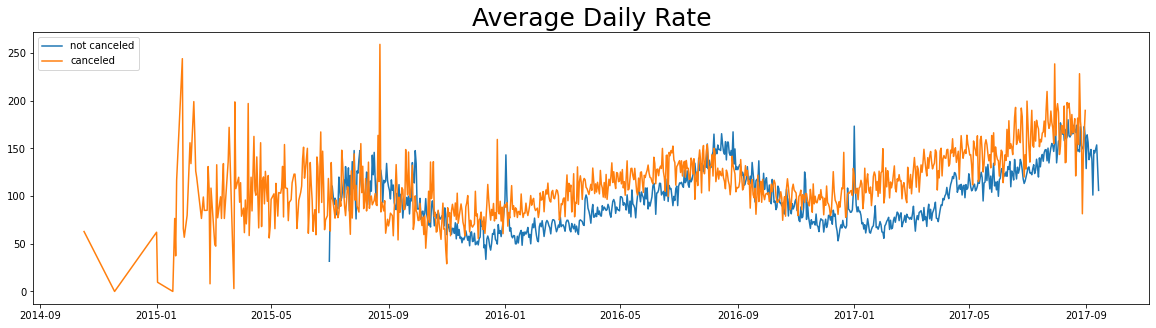

In [132]:
canceled_pdf = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_pdf.reset_index(inplace= True)
canceled_pdf.sort_values("reservation_status_date",inplace = True)


not_canceled_data=data[data["is_canceled"]==0]
not_canceled_pdf = not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_pdf.reset_index(inplace= True)
not_canceled_pdf.sort_values("reservation_status_date",inplace = True)

plt.figure(figsize= (20,5))
plt.title("Average Daily Rate",fontsize= 25)
plt.plot(not_canceled_pdf["reservation_status_date"], not_canceled_pdf["adr"],label="not canceled")
plt.plot(canceled_pdf["reservation_status_date"], canceled_pdf["adr"],label="canceled")
plt.legend(fontsize=25)
plt.show()

In [133]:
canceled_pdf = canceled_pdf[(canceled_pdf["reservation_status_date"]>'2016') & (canceled_pdf["reservation_status_date"]<'2017-09')]
not_canceled_pdf = not_canceled_pdf[(not_canceled_pdf["reservation_status_date"]>'2016') & (not_canceled_pdf["reservation_status_date"]<'2017-09')]

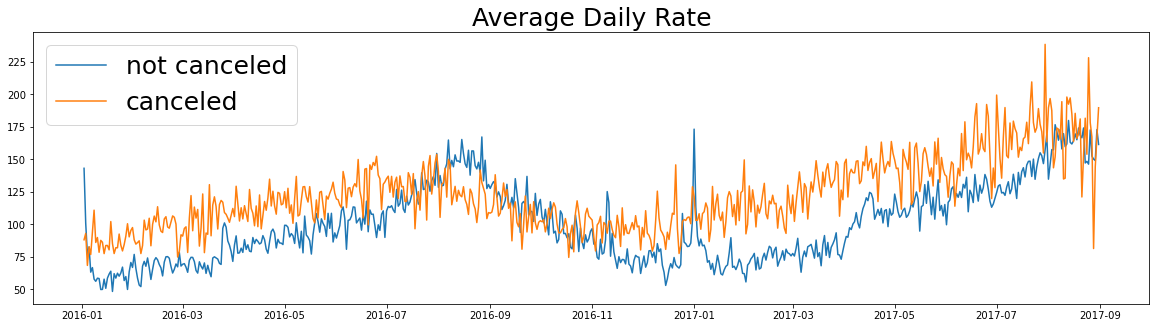

In [142]:
plt.figure(figsize= (20,5))
plt.title("Average Daily Rate",fontsize= 25)
plt.plot(not_canceled_pdf["reservation_status_date"], not_canceled_pdf["adr"],label="not canceled")
plt.plot(canceled_pdf["reservation_status_date"], canceled_pdf["adr"],label="canceled")
plt.legend(fontsize=25)
plt.show()

# Project Report

## Analysis and finding
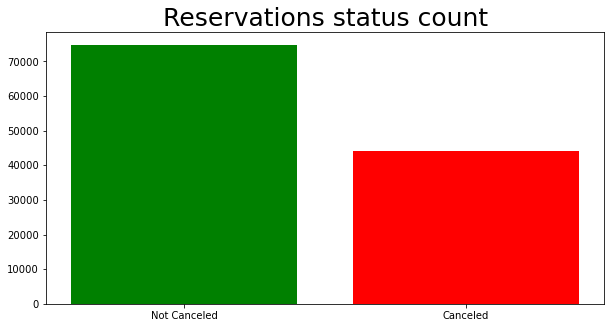
### The accompanying bar graph shows the percentage of reservations that are canceled and those are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are 37% of people who canceled their reservation, which has a significant impact on the hotel's earnings.

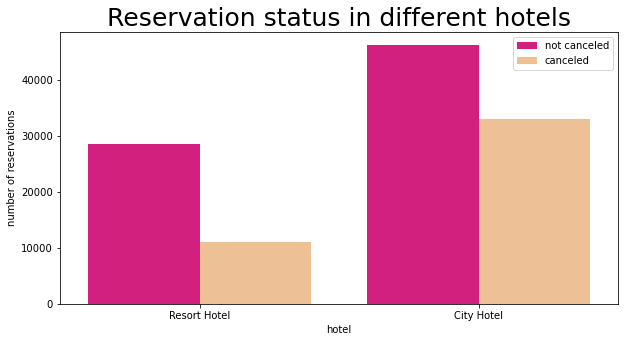
### In comparison to the resort hotels, city hotels have more bookings. It is possible that resort hotels are more expensive than those in cities.

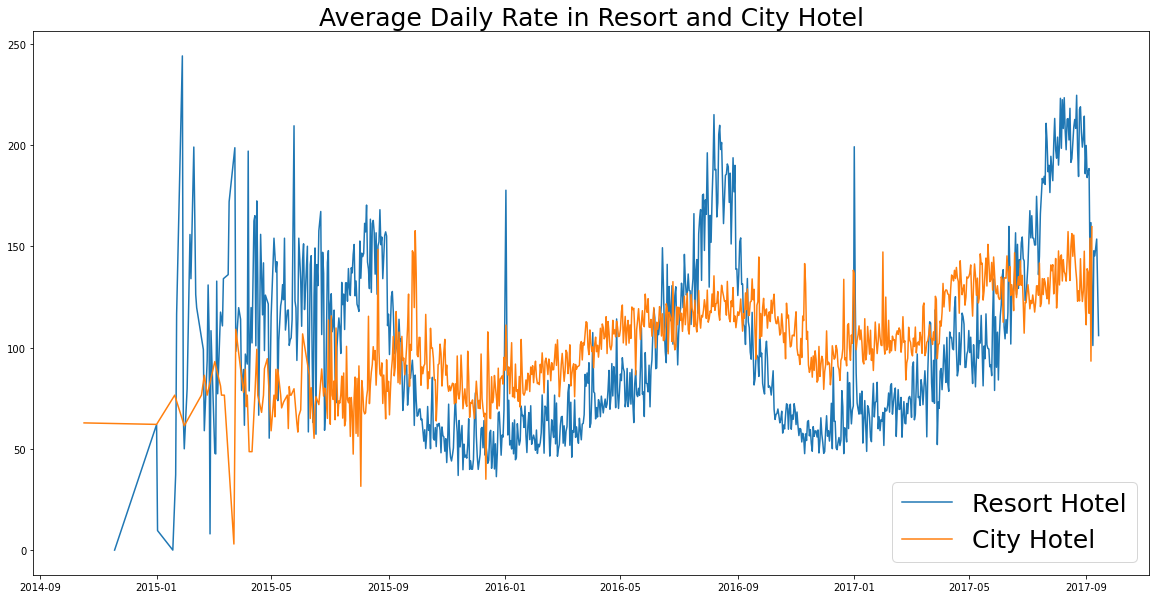
### The line graph shows that, on certain days, the average daily rate for a city hotel is less than of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

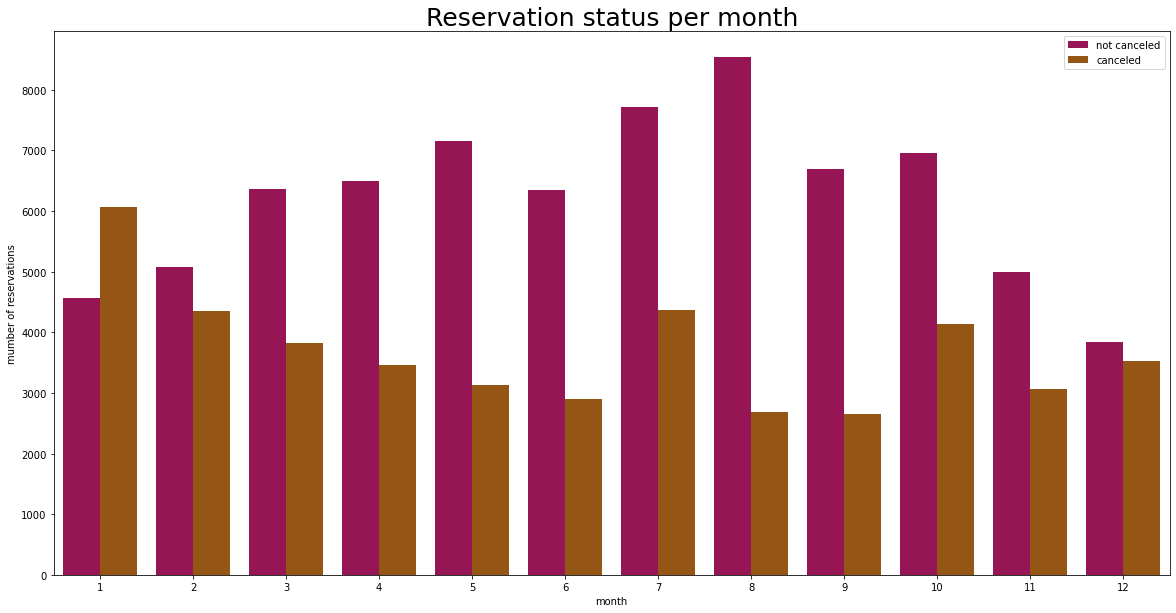
### We have deployed the grouped bar graph to analyze the months with the height and lowest reservation levels according to reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservasions are largest in the month of August. Whereas january is the month with the most canceled reservations.

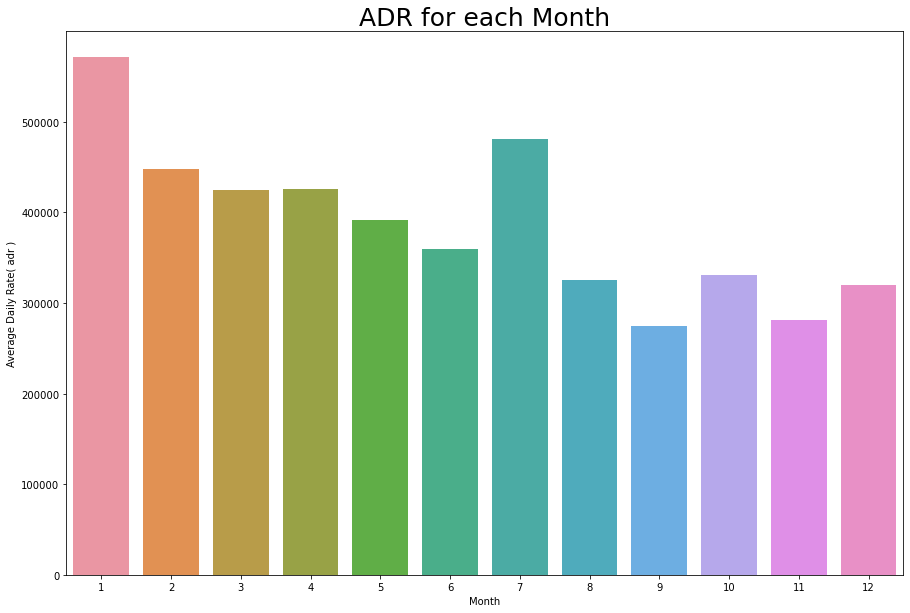
### This bar graph shows that cancellations are most common when price are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

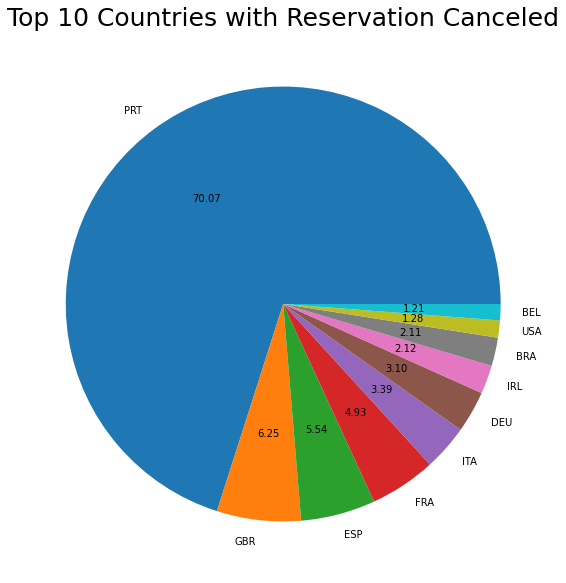
### Top 10 countries, which has the highest reservation canceled. Here we can see that Portugal (PRT) is that country, where cancellations is heighest.

### Now, the area from where guests are visiting the hotels and making reservations. Is it comming from Direct or Groups, Online or offline Travel Agents? Around 46% of the people come from Online Travel Agent, whereas 27% come from groups. Only 4% of customers book hotels directly by visiting them and making reservations.

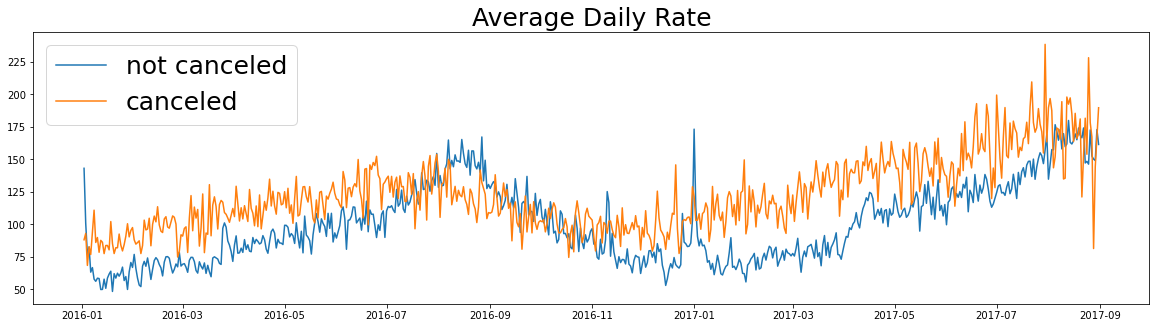
### This graph shows that, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all above analysis, that the heigher price leads to higher cancellation.